Setup and import

In [61]:
import numpy as np
from scipy.optimize import fsolve
from sympy import primepi
import matplotlib.pyplot as plt
import mpmath
import csv
import scipy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.optimize import leastsq
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Equation

In [62]:
def equation(x, a, pi_a):
    argument = a - a / (x * np.pi / 2)
    if argument <= 0:
        return np.nan
    result = pi_a - a / np.log(argument)
    return float(result)


In [63]:
# Define the range and step size for a
a_start = 10**7
a_end =   10**7+1000
a_step =  1

# Generate values for a
a_values = np.arange(a_start, a_end + a_step, a_step)

# Arrays to hold the results
x_solutions = []
f_values = []
abs_li_minus_pi_values = []
abs_f_minus_pi_values = []

# Compute x for each value of a
prime_pi=[]
index=0
for a in a_values:
    pi_a = primepi(a)
    prime_pi.append(pi_a)
    # Use fsolve to find the root of the equation
    x_initial_guess = 1
    x_solution, = fsolve(equation, x_initial_guess, args=(a, pi_a))
    print(a, x_solution)
    x_solutions.append(x_solution)

    # Calculate the modified f(x) using the solution x
    if x_solution > 0:  # Ensure x_solution is positive
        f_x = a / np.log(a - a / (x_solution * np.pi / 2))
    else:
        f_x = np.nan

    f_values.append(f_x)

    # Calculate Li(x) using mpmath
    li_x = mpmath.li(a)

    abs_li_minus_pi = np.abs(li_x - pi_a)
    abs_f_minus_pi = np.abs(f_x - pi_a)

    abs_li_minus_pi_values.append(abs_li_minus_pi)
    abs_f_minus_pi_values.append(abs_f_minus_pi)


/tmp/ipykernel_6180/3760628940.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(result)


10000000 0.9684993661871839
10000001 0.9685000754181451
10000002 0.9685007846511458
10000003 0.9685014938861882
10000004 0.9685022031232708
10000005 0.9685029123623916
10000006 0.9685036216035545
10000007 0.9685043308467568
10000008 0.9685050400919986
10000009 0.9685057493392805
10000010 0.9685064585886028
10000011 0.968507167839966
10000012 0.9685078770933686
10000013 0.968508586348812
10000014 0.9685092956062947
10000015 0.9685100048658172
10000016 0.9685107141273822
10000017 0.9685114233909852
10000018 0.9685121326566277
10000019 0.968501409973546
10000020 0.9685021192093254
10000021 0.9685028284471442
10000022 0.968503537687002
10000023 0.9685042469289027
10000024 0.968504956172841
10000025 0.9685056654188207
10000026 0.9685063746668386
10000027 0.9685070839168994
10000028 0.9685077931689993
10000029 0.9685085024231372
10000030 0.9685092116793181
10000031 0.9685099209375371
10000032 0.9685106301977982
10000033 0.9685113394600976
10000034 0.9685120487244391
10000035 0.96851275799082

In [64]:
# Perform linear regression on x_solutions based on a_values
slope, intercept = np.polyfit(a_values, x_solutions, 1)
print(f"Linear regression equation: x = {slope:.32f} * a + {intercept:.32f}")


Linear regression equation: x = 0.00000000534978068745266884833728 * a + 0.91505198861507763830047679221025


In [65]:
def logarithmic_regression(x, a):
    def model(params, x):
        c, d = params
        return c + d * np.log(x)

    def objective(params, x, y):
        return model(params, x) - y

    # Initial guess for parameters (c, d)
    initial_params = [0, 1]

    # Solve for parameters using nonlinear least squares
    params, _ = scipy.optimize.leastsq(objective, initial_params, args=(x, a))

    return params

# Perform logarithmic regression on x_solutions based on a_values
log_params = logarithmic_regression(a_values, np.array(x_solutions))
log_predictions = log_params[0] + log_params[1] * np.log(a_values)
log_params[1]
print(f"Logarithmic regression equation: x = {log_params[0]:.15f} + {log_params[1]:.15f} * log(a)")

Logarithmic regression equation: x = 0.105977729238815 + 0.053515755466516 * log(a)


Compute R^2 for log predictions

In [66]:
r2_log = r2_score(x_solutions, log_predictions)
print(f"R-squared for Logarithmic Regression: {r2_log:.12f}")

R-squared for Logarithmic Regression: 0.003497373285


Compute Mean Squared Error for the logarithmic regression

In [67]:
# Compute Mean Squared Error for the logarithmic regression
mse_log = mean_squared_error(x_solutions, log_predictions)
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.12f}")

Mean Squared Error for Logarithmic Regression: 0.000000000681


In [68]:
# Compute Root Mean Squared Error for the logarithmic regression
rmse_log = np.sqrt(mse_log)
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.12f}")

Root Mean Squared Error for Logarithmic Regression: 0.000026099023


In [69]:
def transformed_function(a, slope, intercept):
    x = slope * a + intercept
    if a - (0.6366197724 * a) / x <= 0:
        return np.nan
    pi=np.pi
    return primepi(a) - (a / np.log(a - (0.6366197724 * a) / x))


In [70]:
def transformed_function_log(a, p1, p2):
    x = p1+ p2*np.log(a)
    if a - (0.6366197724 * a) / x <= 0:
        return np.nan
    pi=np.pi
    return primepi(a) - (a / np.log(a - (0.6366197724 * a) / x))

In [71]:
transformed_values = [transformed_function(a, slope, intercept) for a in a_values]
transformed_values_log = [transformed_function_log(a, log_params[0], log_params[1]) for a in a_values]

The equation of the fitted quadratic polynomial is: y = 2478018922.11795330047607421875000000000000 + -495.57900483076849695862620137631893*x + 0.00002477771130315886694006621838*x^2
Mean Squared Error: 1.78607711445559
R-squared: 0.6572139061868605
Mean Squared Error: 1.78604119008940
R-squared: 0.6572203760035871


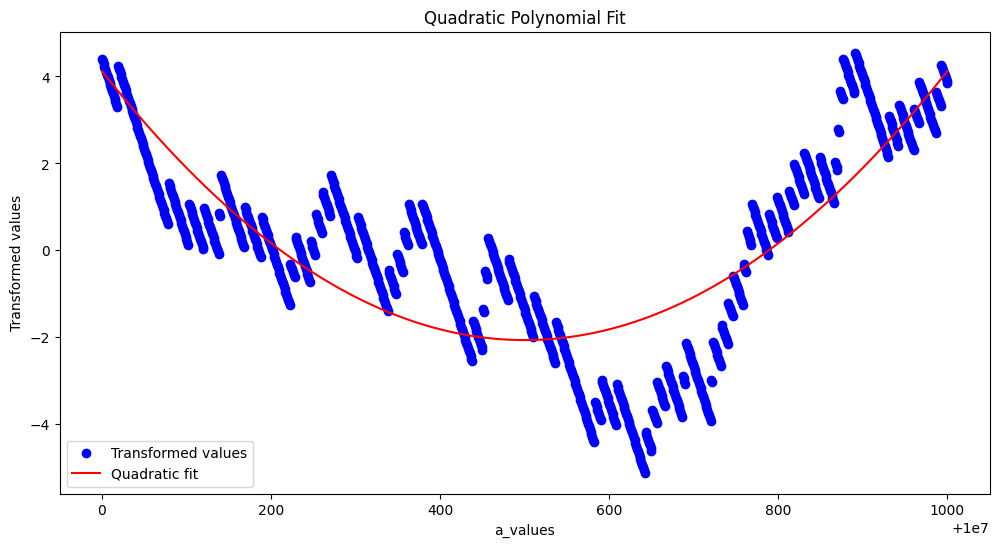

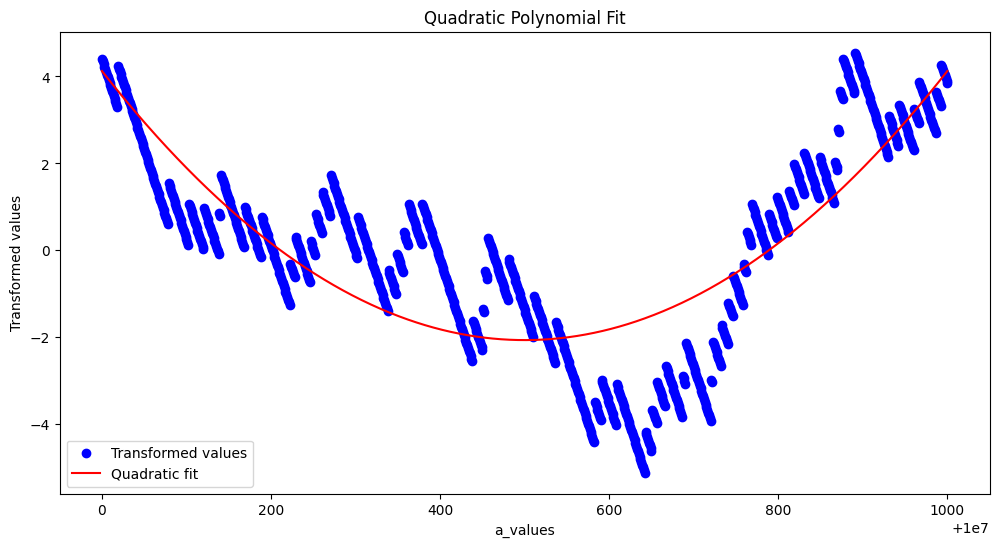

In [72]:
X = a_values.reshape(-1, 1)

# Create quadratic features (x and x^2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, transformed_values)

# Predict the transformed values
y_pred = model.predict(X_poly)

#fit log

poly3 = PolynomialFeatures(degree=3)
X_poly = poly3.fit_transform(X)

# Fit the model
model2 = LinearRegression()

model2.fit(X_poly, transformed_values_log)

# Predict the transformed values
y_pred2 = model2.predict(X_poly)

# Evaluate the model
mse = mean_squared_error(transformed_values, y_pred)
r2 = r2_score(transformed_values, y_pred)
beta_0 = model.intercept_  # Intercept (β_0)
beta_1, beta_2 = model.coef_[1:]  # Coefficients for x and x^2 (β_1 and β_2)

# Print the quadratic equation
print(f"The equation of the fitted quadratic polynomial is: y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



mse = mean_squared_error(transformed_values_log, y_pred2)
r2 = r2_score(transformed_values_log, y_pred2)
#beta_0 = model2.intercept_  # Intercept (β_0)
#beta_1, beta_2 = model.coef_[1:]

#print(f"The equation of the fitted quadratic polynomial is: y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(a_values, transformed_values_log, color='blue', label='Transformed values')
plt.plot(a_values, y_pred2, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()

In [73]:
# Save the results to a CSV file
print(str(a_start))
csv_filename = f"results from {a_start} to {a_end}.csv"
print(csv_filename)
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['a', 'x_solution', 'f(x)', '|Li(x) - pi(x)|', '|f(x) - pi(x)|'])
    for a, x_solution, f_x, li_minus_pi, f_minus_pi in zip(a_values, x_solutions, f_values, abs_li_minus_pi_values, abs_f_minus_pi_values):
        writer.writerow([a, x_solution, f_x, li_minus_pi, f_minus_pi])

print(f"Results saved to {csv_filename}")


10000000
results from 10000000 to 10001000.csv
Results saved to results from 10000000 to 10001000.csv


In [74]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of observations and predictors
n = len(a_values)
p = 1  # Only one predictor in logarithmic regression

adj_r2_log = adjusted_r2(r2_log, n, p)
print(f"Adjusted R-squared for Logarithmic Regression: {adj_r2_log:.32f}")
from scipy import stats
residuals_log = np.array(x_solutions) - np.array(log_predictions)
# Compute F-statistic and p-value
ss_res = np.sum(residuals_log ** 2)
ss_tot = np.sum((np.array(x_solutions) - np.mean(x_solutions)) ** 2)
f_statistic = (ss_tot - ss_res) / p / (ss_res / (n - p - 1))
p_value = 1 - stats.f.cdf(f_statistic, p, n - p - 1)
print(f"R-squared for Logarithmic Regression: {r2_log:.32}")
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.32}")
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.32}")
print(f"F-statistic for Logarithmic Regression: {f_statistic:.32}")
print(f"P-value for F-statistic: {p_value:.32f}")

Adjusted R-squared for Logarithmic Regression: 0.00249987315808519738880022487137
R-squared for Logarithmic Regression: 0.0034973732849270522393680948880501
Mean Squared Error for Logarithmic Regression: 6.8115898585869606998440143810899e-10
Root Mean Squared Error for Logarithmic Regression: 2.6099022699302288887330050770608e-05
F-statistic for Logarithmic Regression: 3.506138185665896411791209175135
P-value for F-statistic: 0.06143374783076982481588856899180


In [75]:
print(f"Logarithmic regression equation: x = {log_params[0]:.32f} + {log_params[1]:.32f} * log(a)")

"""Compute R^2 for log predictions"""

r2_log = r2_score(x_solutions, log_predictions)
print(f"R-squared for Logarithmic Regression: {r2_log:.32f}")

"""Compute Mean Squared Error for the logarithmic regression"""

# Compute Mean Squared Error for the logarithmic regression
mse_log = mean_squared_error(x_solutions, log_predictions)
print(f"Mean Squared Error for Logarithmic Regression: {mse_log:.32f}")

# Compute Root Mean Squared Error for the logarithmic regression
rmse_log = np.sqrt(mse_log)
print(f"Root Mean Squared Error for Logarithmic Regression: {rmse_log:.32f}")

Logarithmic regression equation: x = 0.10597772923881484952168818836071 + 0.05351575546651589354585354385563 * log(a)
R-squared for Logarithmic Regression: 0.00349737328492705223936809488805
Mean Squared Error for Logarithmic Regression: 0.00000000068115898585869606998440
Root Mean Squared Error for Logarithmic Regression: 0.00002609902269930228888733005077


[4.41084558609873, 4.34927275881637, 4.28769993199967, 4.22612710553221, 4.16455427941401, 4.10298145387787, 4.04140862857457, 3.97983580385335, 3.91826297948137, 3.85669015545864, 3.79511733178515, 3.73354450869374, 3.67197168583516, 3.61039886344224, 3.54882604151499, 3.48725321993697, 3.42568039882462, 3.36410757806152, 3.30253475776408, 4.24096193781588, 4.17938911821693, 4.11781629908364, 4.05624348041601, 3.99467066209763, 3.93309784424491, 3.87152502662502, 3.80995220958721, 3.74837939301506, 3.68680657667574, 3.62523376080208, 3.56366094527766, 3.50208813033532, 3.44051531562582, 3.37894250138197, 3.31736968748737, 3.25579687405843, 3.19422406109516, 3.13265124848112, 3.07107843621634, 3.00950562453363, 2.94793281308375, 2.88636000209954, 2.82478719158098, 2.76321438129526, 2.70164157159161, 2.64006876212079, 2.57849595323205, 2.51692314469256, 2.45535033650231, 2.39377752877772, 2.33220472151879, 2.27063191449270, 2.20905910804868, 2.14748630195390, 2.08591349620838, 2.0243406

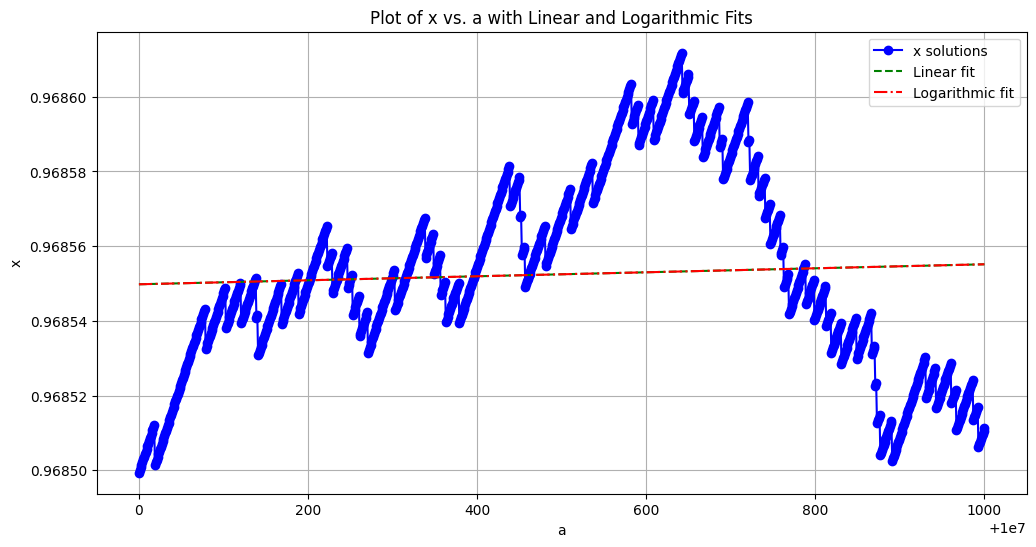

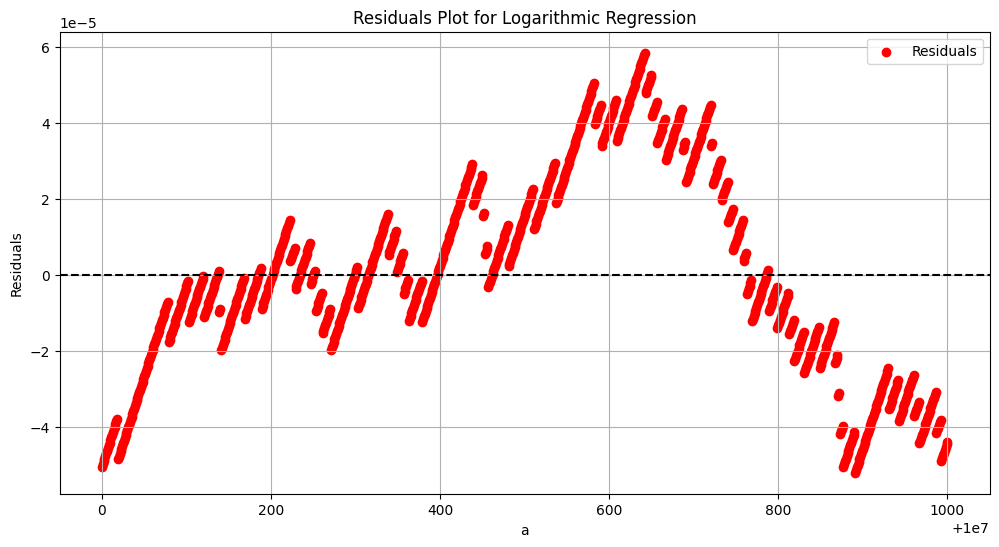

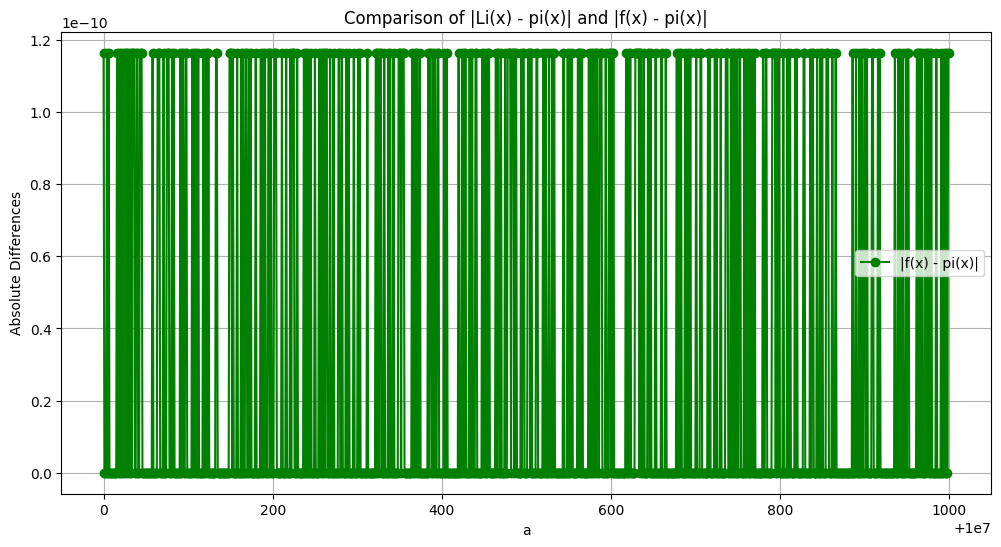

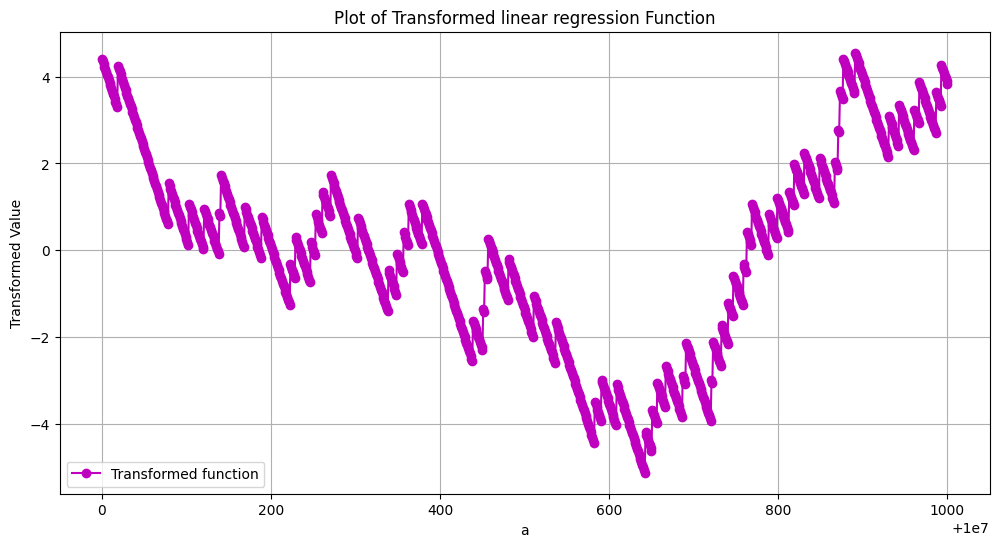

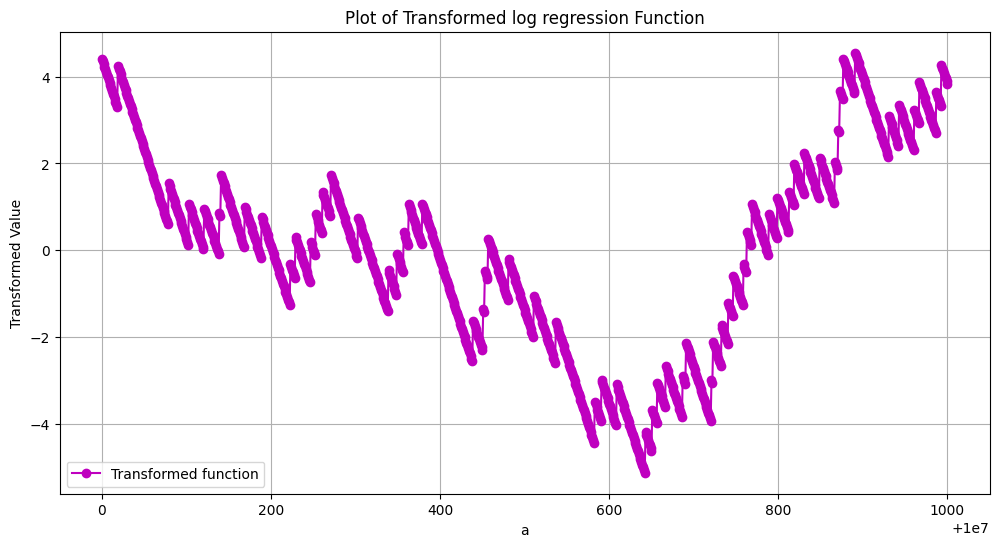

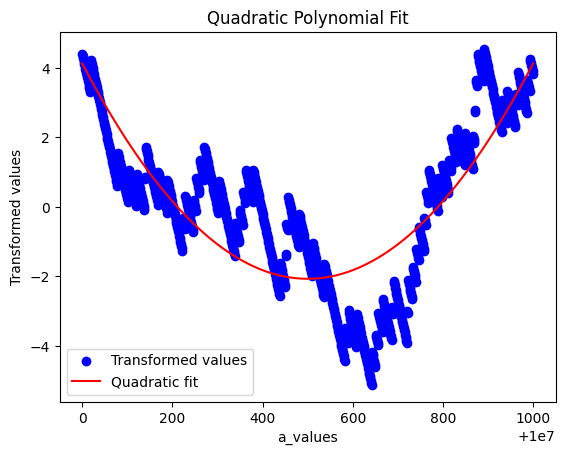

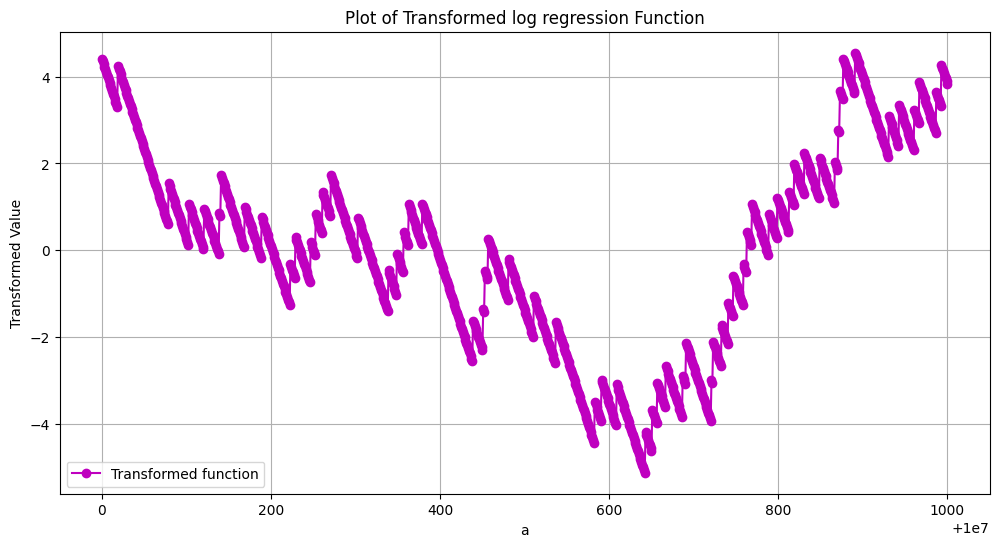

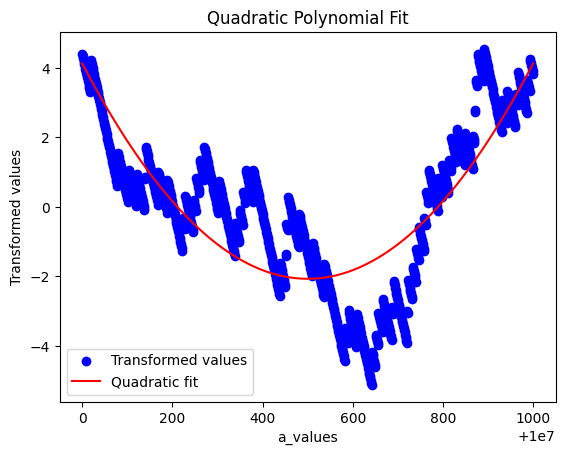

In [76]:

# Plot the linear regression line
print(transformed_values_log)
plt.figure(figsize=(12, 6))
plt.plot(a_values, x_solutions, marker='o', linestyle='-', color='b', label='x solutions')
plt.plot(a_values, slope * a_values + intercept, linestyle='--', color='g', label='Linear fit')
plt.plot(a_values, log_predictions, linestyle='-.', color='r', label='Logarithmic fit')
plt.xlabel('a')
plt.ylabel('x')
plt.title('Plot of x vs. a with Linear and Logarithmic Fits')
plt.legend()
plt.grid(True)
plt.show()

# Compute residuals
residuals_log = np.array(x_solutions) - np.array(log_predictions)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(a_values, residuals_log, marker='o',linestyle='-', color='r', label='Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('a')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Logarithmic Regression')
plt.legend()
plt.grid(True)
plt.show()


# Plotting |Li(x) - pi(x)| and |f(x) - pi(x)| on the same graph
plt.figure(figsize=(12, 6))
#plt.plot(a_values, abs_li_minus_pi_values, marker='o', linestyle='-', color='r', label='|Li(x) - pi(x)|')
plt.plot(a_values, abs_f_minus_pi_values, marker='o', linestyle='-', color='g', label='|f(x) - pi(x)|')
plt.xlabel('a')
plt.ylabel('Absolute Differences')
plt.title('Comparison of |Li(x) - pi(x)| and |f(x) - pi(x)|')
plt.legend()
plt.grid(True)
plt.show()

# Plot the transformed function
plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed linear regression Function')
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values_log, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed log regression Function')
plt.grid(True)
plt.legend()
plt.show()
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(a_values, transformed_values_log, marker='o', linestyle='-', color='m', label='Transformed function')
plt.xlabel('a')
plt.ylabel('Transformed Value')
plt.title('Plot of Transformed log regression Function')
plt.grid(True)
plt.legend()
plt.show()
plt.scatter(a_values, transformed_values, color='blue', label='Transformed values')
plt.plot(a_values, y_pred, color='red', label='Quadratic fit')
plt.xlabel('a_values')
plt.ylabel('Transformed values')
plt.title('Quadratic Polynomial Fit')
plt.legend()
plt.show()


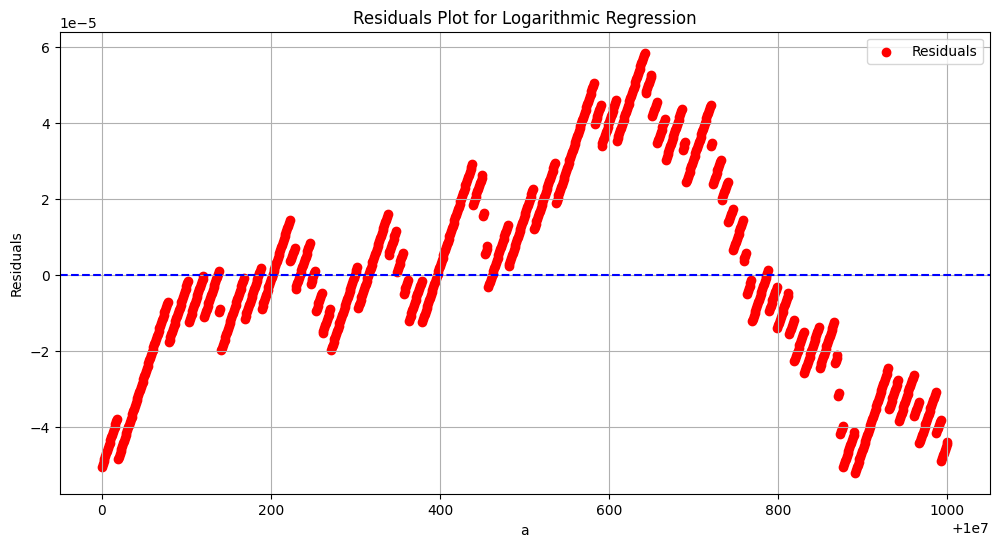

In [77]:
# Compute residuals
residuals_log = np.array(x_solutions) - np.array(log_predictions)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(a_values, residuals_log, marker='o',linestyle='-', color='r', label='Residuals')
plt.axhline(y=0, color='b', linestyle='--')
plt.xlabel('a')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Logarithmic Regression')
plt.legend()
plt.grid(True)
plt.show()

2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 2.0 8.0
2.1 

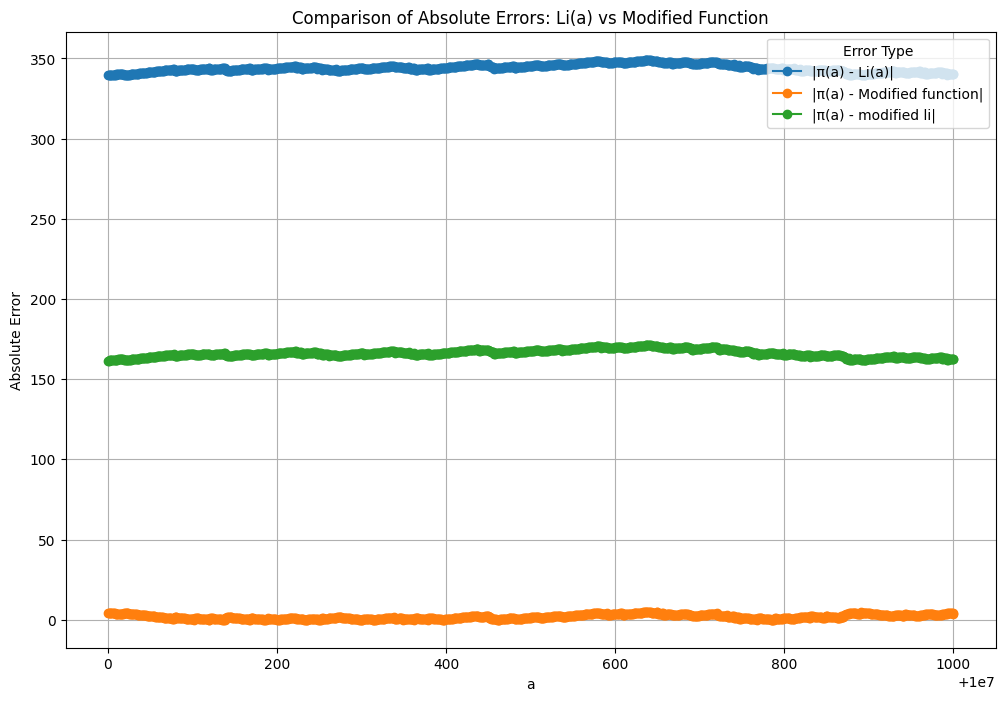

In [78]:
import mpmath

# Define the logarithmic integral function
def li(x):
    return mpmath.li(x)

def most_left_digit_math(num):
    num = abs(num)  # Work with the absolute value
    while num >= 10:
        num //= 10  # Integer division by 10
    return int(num) 

# Define the modified function based on your previous code
def modified_function2(a, rg):
    argument = a - a / (rg * np.pi / 2)
    if argument <= 0:
        return np.nan
    return  (a / np.log(argument))

# Arrays to hold the results
li_errors = []
mod_errors = []
diff_li=[]
li_errors2=[]
# Use your computed regression factor


# Compute errors for each value of x
index=0
for a, x in zip(a_values, x_solutions):
    pi_x = prime_pi[index]
    li_x = li(a)
    rg = log_params[0] + log_params[1] * np.log(a)
    mod_x = modified_function2(a, rg)
    #xlnx=a/(np.log(a))
    #diff_li.append(li_x-xlnx)
    first_digit=most_left_digit_math(a)
    minus_num=np.floor((np.floor(np.log10(a))+1)/3)#np.floor(np.log10(a)-2)
    print(minus_num+first_digit/10,minus_num,np.floor(np.log10(a)+1))
    """if first_digit==1:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/20))"""
    if first_digit>4:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/8))
    else:
        li_errors2.append(li_x-pi_x-10**(minus_num+first_digit/4))
    li_errors.append(li_x-pi_x)
    mod_errors.append(abs(pi_x - mod_x))
    index+=1
print("li  errors values:",li_errors)
print("li modified errors values:",li_errors2)
# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(a_values, li_errors,marker="o", label='|π(a) - Li(a)|')
plt.plot(a_values, mod_errors,marker="o", label='|π(a) - Modified function|')
plt.plot(a_values, li_errors2,marker="o", label='|π(a) - modified li|')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified Function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig(f'error_comparison_plot {a_start} to {a_end}.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

R-squared: 0.17824323360685246
Mean Squared Error: 1.5027090693852532
Root Mean Squared Error: 1.225850345427717
Linear Regression Equation: y = -19756.51729567358779604546725749969482 + 0.00197573683972261052860242003248 * x


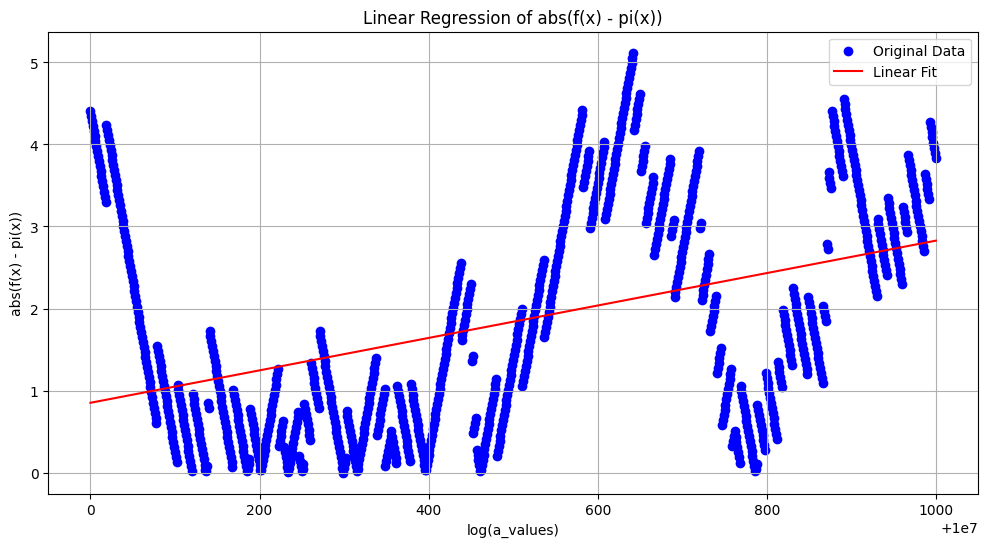

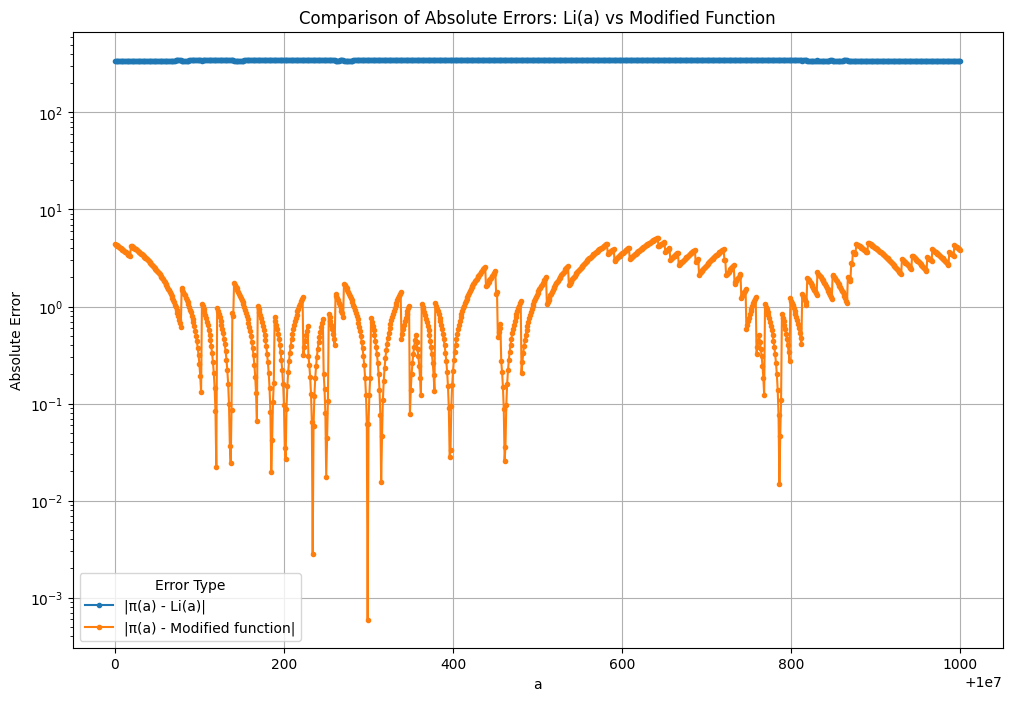

In [79]:


# Transform a_values to log scale and reshape for sklearn
log_a_values=a_values.reshape(-1, 1)
# Ensure that abs(f(x) - pi(x)) is in a numpy array and reshaped for sklearn
y_values = np.array(mod_errors).reshape(-1, 1)

# Create a LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the log-transformed data
lin_reg.fit(log_a_values, y_values)

# Get the predictions
y_pred = lin_reg.predict(log_a_values)

# Check for NaN or Inf in y_pred
if np.any(np.isnan(y_pred)) or np.any(np.isinf(y_pred)):
    raise ValueError("y_pred contains NaN or Inf values")

# Flatten y_values and y_pred for metrics calculations
y_values = np.ravel(y_values)
y_pred = np.ravel(y_pred)

# Calculate R-squared
r2 = r2_score(y_values, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_values, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

intercept = lin_reg.intercept_[0]
slope = lin_reg.coef_[0][0]
print(f"Linear Regression Equation: y = {intercept:.32f} + {slope:.32f} * x")

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(log_a_values, y_values, color='blue', label='Original Data')
plt.plot(log_a_values, y_pred, color='red', label='Linear Fit')
plt.xlabel('log(a_values)')
plt.ylabel('abs(f(x) - pi(x))')
plt.title('Linear Regression of abs(f(x) - pi(x))')
plt.legend()
plt.grid(True)



# Create the plot"""
plt.figure(figsize=(12, 8))
plt.semilogy(a_values, li_errors,marker=".", label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors,marker=".", label='|π(a) - Modified function|')


plt.title('Comparison of Absolute Errors: Li(a) vs Modified Function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('error_comparison_plot ${a_start} to ${a_end} .png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

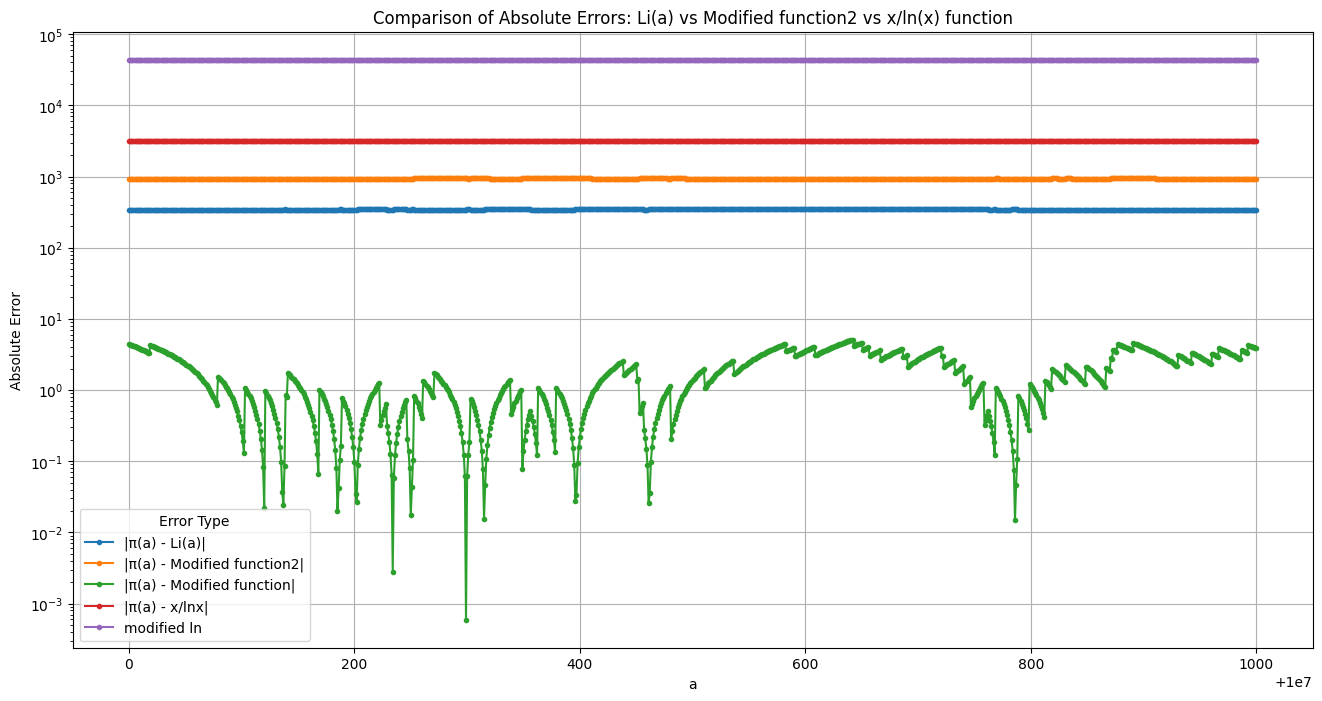

In [80]:
mod_errors2=[]
mod_ln=[]
mod_ln_ln2=[]
index=0


for a, x in zip(a_values, x_solutions):
    pi_x = prime_pi[index]
    rg = log_params[0] + log_params[1] * np.log(a)
    # y = {beta_0:.32f} + {beta_1:.32f}*x + {beta_2:.32f}*x^2")
    rg=0.00000000000002707791861318303864 * a + 0.97951396382809330365404321128153
    mod_x = modified_function2(a, rg)+(beta_0 + beta_1*a + beta_2*a**2)

    mod_errors2.append(abs(pi_x - mod_x))
    lnFunc=a/(np.log(a)-1)
    lnFunc2=a/(np.log(a)-2)
    mod_ln.append(abs(pi_x - lnFunc))
    mod_ln_ln2.append(abs(pi_x - lnFunc2))
    index+=1
plt.figure(figsize=(16, 8))
plt.semilogy(a_values, li_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
plt.semilogy(a_values, mod_errors,marker='.', label='|π(a) - Modified function|')
plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
plt.semilogy(a_values, mod_ln_ln2,marker=".", label='modified ln')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

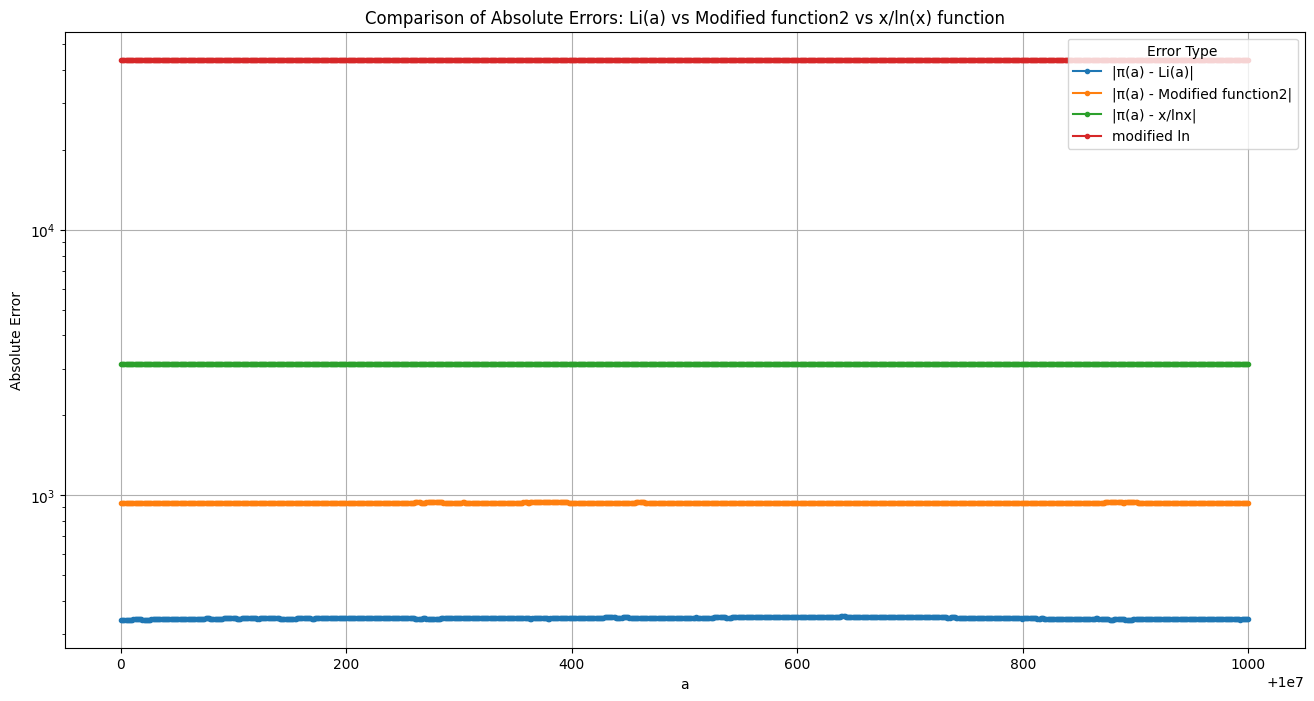

In [81]:
plt.figure(figsize=(16, 8))
plt.semilogy(a_values, li_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
plt.semilogy(a_values, mod_ln_ln2,marker=".", label='modified ln')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

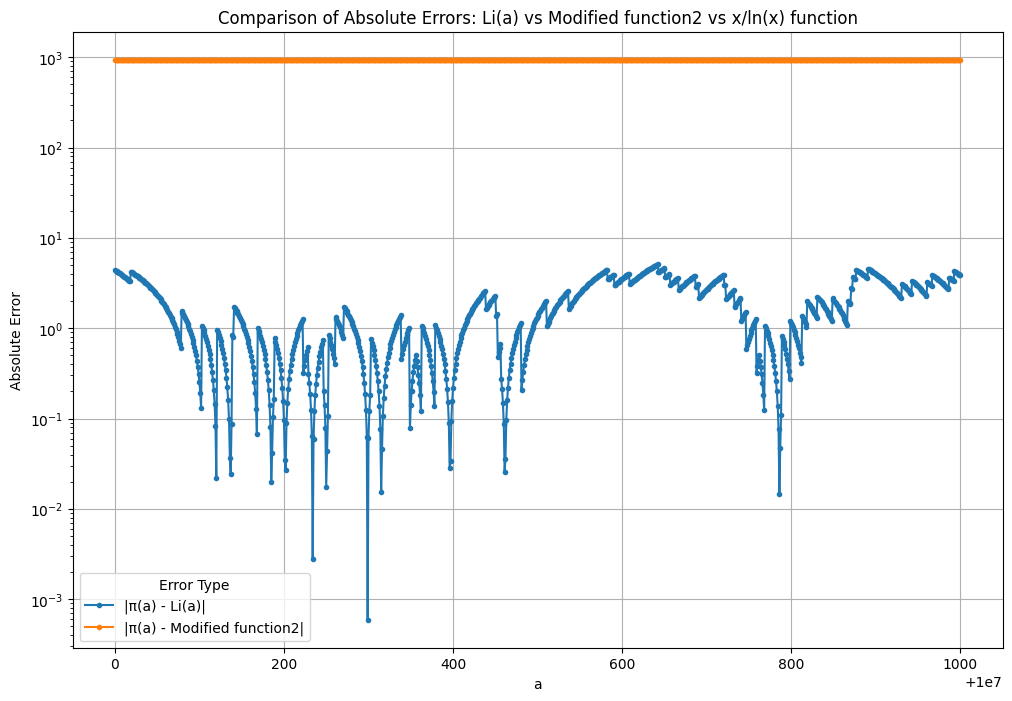

In [82]:
plt.figure(figsize=(12, 8))
plt.semilogy(a_values, mod_errors,marker='.', label='|π(a) - Li(a)|')
plt.semilogy(a_values, mod_errors2,marker='.', label='|π(a) - Modified function2|')
#plt.semilogy(a_values, mod_ln,marker=".", label='|π(a) - x/lnx|')
#plt.semilogy(a_values, mod_ln_ln2,marker=".", label='|π(a) - x/lnx^2|')

plt.title('Comparison of Absolute Errors: Li(a) vs Modified function2 vs x/ln(x) function')
plt.xlabel('a')
plt.ylabel('Absolute Error')
plt.legend(title='Error Type')
plt.grid(True)
# Save the plot as a PNG file
plt.savefig('error_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot (optional, if you're running this in an environment that can show plots)
plt.show()

In [89]:

import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment
print(transformed_values_log)
array_log=[0.513336038216949, 0.458095508627594, 0.402854977175593, 0.347614444792271, 0.292373915202916, 0.237133383750916, 0.181892852298915, 1.12665232084692, 1.07141178939492, 1.01617125980556, 0.960930728353560, 0.905690196901560, 0.850449666380882, 0.795209134928882, 0.739968604408205, 0.684728072956204, 0.629487542435527, 0.574247011914849, 0.519006479531527, 0.463765949010849, 0.408525417558849, 0.353284887038171, 0.298044356517494, 0.242803825996816, 0.187563294544816, 0.132322764024138, 0.0770822335034609, 0.0218417029827833, -0.0333988284692168, -0.0886393589898944, -0.143879890441895, -0.199120420031250, -0.254360951483250, -0.309601482003927, -0.364842011593282, -0.420082543045282, -0.475323074497283, 0.469436395913363, 0.414195864461362, 1.35895533487201, 1.30371480342001, 1.24847427289933, 1.19323374144733, 1.13799321185797, 1.08275268133730, 1.02751215081662, 0.972271621227264, 0.917031090706587, 0.861790560185909, 1.80655002966523, 1.75130949821323, 1.69606896862388, 1.64082843810320, 1.58558790758252, 1.53034737706184, 1.47510684654117, 1.41986631602049, 1.36462578643113, 1.30938525591046, 1.25414472632110, 1.19890419580042, 1.14366366621107, 1.08842313475907, 1.03318260423839, 0.977942074649036, 0.922701545059681, 0.867461013607681, 0.812220484018326, 0.756979954428971, 0.701739423908293, 0.646498894318938, 0.591258362866938, 0.536017833277583, 1.48077730275691, 1.42553677316755, 1.37029624264687, 1.31505571398884, 1.25981518346816, 1.20457465387881, 1.14933412335813, 1.09409359283745, 2.03885306417942, 1.98361253365874, 1.92837200500071, 1.87313147448003, 1.81789094489068, 1.76265041437000, 1.70740988478065, 1.65216935425997, 1.59692882560194, 1.54168829601258, 1.48644776549190, 1.43120723590255, 1.37596670631319, 1.32072617672384, 1.26548564713448, 1.21024511754513, 1.15500458795577, 1.09976405836642, 1.04452352877706, 0.989282999187708, 0.934042469598353, 0.878801939077675, 0.823561410419643, 0.768320880830288, 0.713080351240933, 0.657839821651578, 0.602599292062223, 0.547358763404191, 0.492118232883513, 0.436877704225481, 0.381637173704803, 0.326396645046771, 0.271156116388738, 0.215915585868061, 0.160675056278706, 0.105434527620673, 0.0501939980313182, -0.00504653062671423, -0.0602870611473918, -0.115527590736747, -0.170768118463457, -0.226008648984134, 0.718750821426511, 0.663510293699801, 0.608269764110446, 0.553029234521091, 1.49778870493174, 1.44254817627370, 1.38730764761567, 1.33206711895764, 1.27682658936828, 1.22158605977893, 1.16634553112090, 1.11110500153154, 1.05586447287351, 1.00062394421548, 0.945383414626122, 0.890142885968089, 0.834902357310057, 0.779661828652024, 0.724421299062669, 0.669180769473314, 0.613940240815282, 0.558699713088572, 0.503459184430540, 0.448218653909862, 0.392978126183152, 0.337737596593797, 0.282497067935765, 0.227256539277732, 0.172016009688377, 0.116775481961668, 0.0615349533036351, 0.00629442464560270, -0.0489461040124297, -0.104186632670462, -0.159427162259817, -0.214667689986527, -0.269908219575882, -0.325148747302592, -0.380389275960624, -0.435629805549979, -0.490870334208012, -0.546110861934721, -0.601351390592754, -0.656591919250786, -0.711832446977496, -0.767072975635529, -0.822313504293561, -0.877554032951593, -0.932794561609626, -0.988035090267658, -1.04327561892569, -1.09851614665240, -1.15375667531043, -1.20899720396847, -1.26423773169518, -1.31947826035321, -1.37471878807992, -1.42995931673795, -1.48519984446466, -1.54044037312269, -1.59568090178072, -1.65092142950743, -1.70616195816547, -1.76140248589218, -1.81664301455021, -1.87188354227692, -1.92712407000363, -1.98236459959298, -2.03760512638837, -2.09284565597773, -1.14808618277311, -1.20332671049982, -1.25856723915786, -1.31380776688457, -1.36904829554260, -1.42428882420063, -1.47952935099602, -1.53476987965405, -1.59001040644944, -1.64525093510747, -1.70049146376550, -1.75573199056089, -1.81097251828760, -1.86621304694563, -1.92145357467234, -1.97669410333037, -2.03193463012576, -2.08717515785247, -2.14241568557918, -2.19765621330589, -1.25289674103260, -1.30813726875931, -1.36337779648602, -1.41861832421273, -0.473858851939440, -0.529099379666150, -0.584339908324182, -0.639580435119569, -0.694820963777602, -0.750061490572989, 0.194697981700301, 0.139457453973591, 0.0842169262468815, 0.0289763985201716, -0.0262641282752156, -0.0815046560019255, -0.136745182797313, -0.191985711455345, 0.752773760817945, 0.697533234022558, 0.642292707227170, 0.587052178569138, 0.531811651773751, 0.476571124047041, 1.42133059725165, 1.36609006952494, 1.31084954272956, 1.25560901500285, 1.20036848727614, 1.14512796048075, 1.08988743275404, 1.03464690502733, 0.979406379163265, 0.924165851436555, 0.868925323709846, 0.813684796914458, 0.758444269187748, 0.703203742392361, 0.647963215596974, 0.592722688801587, 0.537482161074877, 0.482241634279490, 0.427001107484102, 0.371760579757392, 0.316520052962005, 0.261279525235295, 1.20603899937123, 1.15079847164452, 1.09555794484913, 1.04031741805375, 0.985076891258359, 0.929836364462972, 0.874595837667584, 0.819355309940875, 1.76411478314549, 1.70887425635010, 1.65363373048604, 1.59839320275933, 1.54315267596394, 1.48791214916855, 1.43267162237316, 1.37743109557778, 1.32219056878239, 1.26695004198700, 1.21170951519161, 1.15646898839623, 2.10122846253216, 2.04598793480545, 1.99074740801007, 1.93550688214600, 1.88026635535061, 1.82502582948655, 1.76978530269116, 1.71454477589577, 1.65930424910039, 1.60406372230500, 1.54882319550961, 1.49358266964555, 1.43834214285016, 1.38310161698610, 1.32786109019071, 1.27262056339532, 1.21738003753126, 1.16213951073587, 1.10689898394048, 1.05165845807642, 0.996417931281030, 0.941177405416965, 0.885936879552901, 0.830696351826191, 0.775455825962126, 0.720215300098062, 0.664974774233997, 0.609734247438610, 0.554493720643222, 0.499253194779158, 0.444012668915093, 0.388772142119706, 0.333531616255641, 0.278291089460254, 0.223050563596189, 0.167810038663447, 0.112569511868060, 0.0573289860039949, 0.00208845920860767, -0.0531520657241344, -0.108392592519522, -0.163633119314909, -0.218873644247651, -0.274114171043038, -0.329354696907103, -0.384595221839845, -0.439835748635232, -0.495076274499297, -0.550316799432039, -0.605557326227427, -0.660797852091491, -0.716038377955556, -0.771278903819621, -0.826519429683685, -0.881759954616427, -0.937000481411815, -0.992241007275879, -1.04748153220862, -1.10272205900401, -1.15796258486807, -1.21320310980082, -1.26844363566488, -1.32368416152894, -1.37892468646169, -1.43416521232575, -1.48940573818982, -1.54464626405388, -1.59988678991795, -1.65512731485069, -1.71036784164608, -1.76560836657882, -1.82084889151156, -1.87608941737562, -1.93132994323969, -1.98657046817243, -2.04181099403650, -2.09705151896924, -2.15229204483330, -1.20753256976604, -1.26277309563011, -1.31801362056285, -1.37325414642692, -1.42849467135966, -1.48373519629240, -1.53897572215647, -1.59421624802053, -1.64945677388459, -1.70469729788601, -1.75993782375008, -1.81517834868282, -1.87041887361556, -1.92565939854831, -1.98089992441237, -2.03614044934511, -2.09138097427785, -2.14662150014192, -2.20186202507466, -2.25710255000740, -2.31234307494015, -2.36758360080421, -1.42282412573695, -1.47806465066969, -1.53330517560244, -1.58854569960386, -1.64378622453660, -1.69902675040066, -1.75426727533340, -1.80950780026615, -1.86474832519889, -1.91998885013163, -1.97522937506437, -2.03046989999712, -2.08571042492986, -2.14095094986260, -1.19619147386402, -1.25143199972808, -1.30667252372950, -1.36191304959357, -1.41715357359499, -1.47239409852773, -0.527634622529149, -0.582875147461891, -0.638115673325956, -0.693356197327375, -0.748596722260118, -0.803837247192860, -0.859077771194279, -0.914318296127021, -0.969558821059763, -1.02479934599251, -1.08003986906260, -1.13528039399534, -1.19052091892809, -1.24576144292951, -1.30100196786225, -1.35624249279499, -1.41148301679641, -1.46672354172915, -1.52196406573057, -1.57720459066331, -1.63244511466473, -1.68768563866615, -0.742926163598895, -0.798166687600315, -0.853407211601734, -0.908647737465799, -0.963888261467218, -1.01912878546864, -1.07436930947006, -1.12960983347148, -0.184850358404219, -0.240090882405639, -0.295331407338381, -0.350571930408478, -0.405812454409897, -0.461052979342639, -0.516293503344059, -0.571534027345479, -0.626774551346898, -0.682015076279640, -0.737255599349737, -0.792496124282479, -0.847736648283899, -0.902977171353996, -0.958217696286738, -1.01345821935683, -1.06869874335825, -1.12393926829100, -1.17917979136109, -1.23442031536251, -1.28966083936393, -1.34490136336535, -1.40014188736677, -1.45538241136819, -1.51062293536961, -1.56586345937103, -1.62110398244113, -1.67634450644255, -1.73158502951264, -1.78682555351406, -1.84206607844681, -1.89730660058558, -1.95254712551832, -2.00778764951974, -1.06302817258984, -1.11826869659126, -1.17350921966136, -1.22874974459410, -1.28399026766419, -1.33923079073429, -0.394471314735711, -0.449711838737130, 0.495047638192773, 0.439807115122676, 0.384566591121256, 0.329326068051159, 0.274085543118417, 0.218845020979643, 0.163604497909546, 0.108363973908126, 0.0531234499067068, -0.00211707316339016, -0.0573575971648097, -0.112598121166229, -0.167838643305004, -0.223079167306423, -0.278319689445198, -0.333560213446617, -0.388800736516714, -0.444041260518134, -0.499281783588231, -0.554522306658328, -0.609762829728425, -0.665003352798522, 0.279756123200059, 0.224515600129962, 0.169275077059865, 0.114034553989768, 0.0587940309196711, 0.00355350784957409, -0.0516870152205229, -0.106927538290620, -0.162168061360717, -0.217408584430814, -0.272649107500911, -0.327889630571008, -0.383130154572427, -0.438370676711202, -0.493611199781299, -0.548851721920073, -0.604092245921493, -0.659332768991590, -0.714573291130364, -0.769813815131783, -0.825054337270558, -0.880294859409332, -0.935535383410752, -0.990775905549526, -1.04601642861962, -1.10125695262104, -1.15649747475982, -1.21173799782991, -1.26697851996869, -1.32221904303879, -1.37745956517756, -1.43270008824766, -1.48794061131775, -1.54318113252521, -1.59842165559530, -1.65366217866540, -1.70890270173550, -1.76414322480559, -1.81938374601305, -1.87462426908314, -1.92986479122192, -1.98510531429201, -2.04034583643079, -2.09558635950089, -2.15082688163966, -2.20606740470976, -2.26130792684853, -2.31654844898731, -1.37178897112608, -1.42702949419618, -0.482270016334951, -0.537510538473725, -0.592751061543822, -0.647991583682597, -0.703232105821371, -0.758472627960145, -0.813713151030242, -0.868953673169017, -0.924194194376469, -0.979434717446566, -1.03467523958534, -1.08991576079279, -1.14515628386289, -1.20039680600166, -1.25563732814044, -1.31087785121053, -1.36611837241799, -1.42135889548808, -0.476599416695535, -0.531839939765632, -0.587080460973084, -0.642320983111858, -0.697561504319310, -0.752802026458085, 0.191957450471818, 0.136716928333044, 0.0814764071255922, 0.0262358849868178, -0.0290046371519566, -0.0842451592907310, -0.139485681429505, -0.194726202636957, -0.249966724775732, -0.305207246914506, 0.639552230946720, 0.584311709739268, 0.529071187600493, 0.473830665461719, 0.418590144254267, 0.363349622115493, 0.308109100908041, 0.252868579700589, 0.197628057561815, 0.142387536354363, 0.0871470142155886, 0.0319064920768142, -0.0233340291306376, -0.0785745512694120, -0.133815072476864, -0.189055593684316, -0.244296115823090, -0.299536637030542, -0.354777159169316, -0.410017680376768, -0.465258201584220, -0.520498723722994, -0.575739243999124, -0.630979766137898, -0.686220287345350, -0.741460809484124, -0.796701330691576, -0.851941852830350, -0.907182373106480, -0.962422895245254, -1.01766341645271, -1.07290393766016, -0.128144458867610, -0.183384980075061, -0.238625502213836, -0.293866023421288, -0.349106543697417, -0.404347064904869, -0.459587586112320, -0.514828107319772, -0.570068628527224, -0.625309149734676, -0.680549670942128, -0.735790192149580, -0.791030713357031, -0.846271234564483, -0.901511754840612, -0.956752276979387, -1.01199279818684, -1.06723331939429, -0.122473839670420, -0.177714360877872, -0.232954882085323, -0.288195403292775, -0.343435923568904, -0.398676445707679, -0.453916965983808, -0.509157487191260, -0.564398007467389, -0.619638528674841, -0.674879049882293, -0.730119570158422, -0.785360091365874, -0.840600611642003, -0.895841132849455, -0.951081654056907, -0.00632217433303595, -0.0615626955404878, -0.116803215816617, -0.172043736092746, -0.227284257300198, -0.282524778507650, -0.337765299715102, -0.393005819059908, 0.551753659732640, 0.496513139456511, 0.441272618249059, 0.386032097972929, 0.330791577696800, 0.275551057420671, 0.220310537144542, 0.165070015937090, 0.109829495660961, 0.0545889753848314, 0.999348455108702, 0.944107932969928, 0.888867412693799, 0.833626892417669, 0.778386372141540, 0.723145852796733, 0.667905332520604, 0.612664811313152, 1.55742429103702, 1.50218377076089, 1.44694325141609, 1.39170273020864, 2.33646220993251, 2.28122169058770, 2.22598116938025, 2.17074064910412, 2.11550012882799, 2.06025960948318, 2.00501908827573, 1.94977856893092, 1.89453804772347, 1.83929752744734, 1.78405700810254, 1.72881648782641, 1.67357596848160, 1.61833544727415, 2.56309492699802, 2.50785440672189, 2.45261388737708, 2.39737336710095, 2.34213284775615, 2.28689232748002, 2.23165180720389, 2.17641128785908, 2.12117076851428, 2.06593024823815, 2.01068972796202, 1.95544920861721, 1.90020868834108, 1.84496816899627, 1.78972764872015, 1.73448712937534, 1.67924660909921, 1.62400608882308, 1.56876556947827, 1.51352504920214, 1.45828452985734, 1.40304400958121, 1.34780349023640, 1.29256297089159, 1.23732245154679, 1.18208193220198, 1.12684141192585, 1.07160089258105, 1.01636037230492, 0.961119852960110, 1.90587933361530, 1.85063881427050, 1.79539829399437, 1.74015777464956, 2.68491725437343, 2.62967673595995, 2.57443621568382, 2.51919569633901, 2.46395517699420, 2.40871465764940, 2.35347413830459, 2.29823361895978, 2.24299309961498, 2.18775258027017, 2.13251205999404, 2.07727154251188, 2.02203102223575, 1.96679050289094, 1.91154998354614, 1.85630946420133, 1.80106894485652, 1.74582842551172, 1.69058790616691, 1.63534738775343, 1.58010686840862, 1.52486634906381, 1.46962583065033, 1.41438531130552, 1.35914479102939, 1.30390427261591, 1.24866375327110, 1.19342323485762, 1.13818271551281, 1.08294219709933, 1.02770167682320, 0.972461158409715, 0.917220639996231, 0.861980120651424, 0.806739602237940, 0.751499081961811, 0.696258563548326, 0.641018044203520, 0.585777525790036, 0.530537006445229, 0.475296488031745, 0.420055968686938, 0.364815451204777, 0.309574931859970, 0.254334413446486, 0.199093894101679, 0.143853375688195, 0.0886128563433886, 0.0333723369985819, -0.0218681804835796, -0.0771086998283863, -0.132349218241870, -0.187589737586677, -0.242830255068839, -0.298070773482323, -0.353311292827129, -0.408551811240613, -0.463792329654098, -0.519032848067582, -0.574273366481066, -0.629513884894550, -0.684754403308034, -0.739994921721518, -0.795235440135002, -0.850475960411131, -0.905716477893293, -0.960956996306777, -1.01619751472026, -1.07143803406507, -1.12667855154723, -1.18191906996071, -1.23715958837420, -0.292400106787682, -0.347640625201166, -0.402881142683327, -0.458121662028134, -0.513362179510295, -0.568602698855102, 0.376156783662736, 0.320916265249252, 1.26567574776709, 1.21043522842228, 1.15519471000880, 1.09995419252664, 1.04471367411315, 0.989473156630993, 0.934232638217509, 0.878992119804025, 0.823751601390541, 0.768511083908379, 0.713270566426218, 0.658030048012733, 0.602789529599249, 0.547549011185765, 0.492308493703604, 0.437067976221442, 0.381827458739281, 0.326586940325797, 0.271346422843635, 0.216105904430151, 0.160865386947989, 0.105624867603183, 0.0503843510523438, -0.00485616736114025, -0.0600966857746243, -0.115337203256786, -0.170577720738947, -0.225818238221109, -0.281058755703270, -0.336299274116755, -0.391539791598916, -0.446780309081078, -0.502020827494562, -0.557261344976723, -0.612501861527562, -0.667742379941046, 0.277017102576792, 0.221776584163308, 0.166536067612469, 0.111295550130308, 1.05605503264815, 1.00081451423466, 0.945573997683823, 0.890333479270339, 0.835092961788177, 0.779852445237339, 0.724611926823854, 0.669371409341693, 0.614130892790854, 0.558890375308692, 0.503649856895208, 0.448409339413047, 1.39316882193089, 1.33792830538005, 1.28268778789788, 1.22744727134705, 1.17220675386488, 1.11696623638272, 1.06172571890056, 1.00648520141840, 0.951244684867561, 0.896004167385399, 0.840763649903238, 0.785523133352399, 0.730282614938915, 0.675042099319398, 0.619801580905914, 0.564561064355075, 0.509320546872914, 0.454080029390752, 0.398839512839913, 0.343598996289074, 0.288358478806913, 0.233117962256074, 0.177877444773912, 0.122636927291751, 0.0673964107409120, 0.0121558941900730, -0.0430846232920885, -0.0983251398429275, -0.153565657325089, -0.208806172944605, -0.264046690426767, -0.319287207908928, -0.374527724459767, -0.429768241010606, -0.485008757561445, -0.540249274112284, -0.595489791594446, -0.650730309076607, 0.294029175303876, 0.238788658753037, 0.183548141270876, 0.128307624720037, 0.0730671081691980, 0.0178265906870365, -0.0374139258638024, -0.0926544414833188, -0.147894958965480, -0.203135474584997, -0.258375992067158, -0.313616508617997, -0.368857024237514, -0.424097541719675, -0.479338058270514, -0.534578573890030, -0.589819090440869, -0.645059606991708, -0.700300122611225, -0.755540640093386, -0.810781156644225, -0.866021672263741, -0.921262189745903, -0.976502705365419, -1.03174322191626, -1.08698373846710, -1.14222425408661, -1.19746477156878, -1.25270528718829, -1.30794580280781, -0.363186319358647, -0.418426836840808, -0.473667352460325, -0.528907869011164, -0.584148384630680, -0.639388901181519, -0.694629417732358, -0.749869932420552, -0.805110448971391, -0.860350965522230, -0.915591481141746, -0.970831998623908, -1.02607251331210, -1.08131302986294, -1.13655354548246, -1.19179406203330, -0.247034577652812, -0.302275094203651, 0.642484390176833, 0.587243873625994, 0.532003358006477, 0.476762842386961, 0.421522326767445, 0.366281810216606, 0.311041294597089, 0.255800778977573, 0.200560263358057, 0.145319746807218, 0.0900792311877012, 0.0348387155681849, -0.0204018000513315, -0.0756423166021705, -0.130882832221687, -0.186123346909881, -0.241363863460720, -0.296604379080236, -0.351844893768430, -0.407085410319269, -0.462325925007463, -0.517566441558301, -0.572806956246495, -0.628047472797334, 0.316712012514472, 0.261471495963633, 0.206230981275439, 0.150990465655923, 0.0957499491050839, 0.0405094344168901, 0.985268918797374, 0.930028403177857, 0.874787887558341, 0.819547372870147, 0.764306857250631, 0.709066341631114, 0.653825826011598, 0.598585310392082, 0.543344795703888, 0.488104280084372, 0.432863764464855, 0.377623250707984, 0.322382735088468, 0.267142218537629, 0.211901703849435, 0.156661188229918, 0.101420673541725, 0.0461801579222083, -0.00906035676598549, -0.0643008714541793, -0.119541387073696, -0.174781902693212, -0.230022417381406, -0.285262932069600, -0.340503448620439, -0.395743963308632, -0.450984477996826, -0.506224993616343, -0.561465508304536, -0.616706023924053, -0.671946537680924, -0.727187052369118]
print(type(transformed_values_log))
array_log=[4.41084558609873, 4.34927275881637, 4.28769993199967, 4.22612710553221, 4.16455427941401, 4.10298145387787, 4.04140862857457, 3.97983580385335, 3.91826297948137, 3.85669015545864, 3.79511733178515, 3.73354450869374, 3.67197168583516, 3.61039886344224, 3.54882604151499, 3.48725321993697, 3.42568039882462, 3.36410757806152, 3.30253475776408, 4.24096193781588, 4.17938911821693, 4.11781629908364, 4.05624348041601, 3.99467066209763, 3.93309784424491, 3.87152502662502, 3.80995220958721, 3.74837939301506, 3.68680657667574, 3.62523376080208, 3.56366094527766, 3.50208813033532, 3.44051531562582, 3.37894250138197, 3.31736968748737, 3.25579687405843, 3.19422406109516, 3.13265124848112, 3.07107843621634, 3.00950562453363, 2.94793281308375, 2.88636000209954, 2.82478719158098, 2.76321438129526, 2.70164157159161, 2.64006876212079, 2.57849595323205, 2.51692314469256, 2.45535033650231, 2.39377752877772, 2.33220472151879, 2.27063191449270, 2.20905910804868, 2.14748630195390, 2.08591349620838, 2.02434069092851, 1.96276788599789, 1.90119508153293, 1.83962227753364, 1.77804947376717, 1.71647667046636, 1.65490386763122, 1.59333106526174, 1.53175826312508, 1.47018546157051, 1.40861266024876, 1.34703985939268, 1.28546705900226, 1.22389425896108, 1.16232145938557, 1.10074866027571, 1.03917586139869, 0.977603062987328, 0.916030265041627, 0.854457467445172, 0.792884670314379, 0.731311873532832, 0.669739077216946, 0.608166281250305, 1.54659348563291, 1.48502069048118, 1.42344789579511, 1.36187510157470, 1.30030230758712, 1.23872951406520, 1.17715672100894, 1.11558392830193, 1.05401113594417, 0.992438344052061, 0.930865552625619, 0.869292761548422, 0.807719970936887, 0.746147180674598, 0.684574390761554, 0.623001601314172, 0.561428812332451, 0.499856023699977, 0.438283235533163, 0.376710447599180, 0.315137660247274, 0.253564873128198, 0.191992086591199, 0.130419300403446, 1.06884651456494, 1.00727372930851, 0.945700944284908, 0.884128159726970, 0.822555375634693, 0.760982591775246, 0.699409808381461, 0.637837025569752, 0.576264242990874, 0.514691460877657, 0.453118679113686, 0.391545897815377, 0.329973116982728, 0.268400336382911, 0.206827556365170, 0.145254776580259, 0.0836819973774254, 0.0221092185238376, 0.960536440019496, 0.898963661864400, 0.837390884291381, 0.775818106951192, 0.714245330193080, 0.652672553784214, 0.591099777724594, 0.529527002130635, 0.467954226885922, 0.406381452106871, 0.344808677677065, 0.283235903712921, 0.221663130098023, 0.160090356948785, 0.0985175841487944, 0.0369448116980493, -0.0246279601706192, -0.0862007316900417, 0.852226497139782, 0.790653726318851, 1.72908095596358, 1.66750818607397, 1.60593541653361, 1.54436264745891, 1.48278987873346, 1.42121711047366, 1.35964434256312, 1.29807157500181, 1.23649880802259, 1.17492604127619, 1.11335327499546, 1.05178050906397, 0.990207743714564, 0.928634978597984, 0.867062213947065, 0.805489449761808, 0.743916685925797, 0.682343922439031, 0.620771159417927, 0.559198396862485, 0.497625634656288, 0.436052872799337, 0.374480111408047, 0.312907350482419, 0.251334589906037, 0.189761829678901, 0.128189069917426, 0.0666163105051965, 1.00504355155863, 0.943470793077722, 0.881898034946062, 0.820325277163647, 0.758752519846894, 0.697179762879387, 0.635607006377541, 0.574034250224940, 0.512461494538002, 0.450888739316724, 0.389315984444693, 0.327743229921907, 0.266170475864783, 0.204597722156905, 0.143024968914688, 0.0814522160217166, 0.0198794635944068, -0.0416932883672416, -0.103266040096059, -0.164838791359216, 0.773588457843289, 0.712015707395039, 0.650442957412452, 0.588870207779109, 0.527297458611429, 0.465724709909409, 0.404151961440220, 0.342579213436693, 0.281006465898827, 0.219433718710206, 0.157860971987247, 0.0962882256135345, 0.0347154797054827, -0.0268572658533230, -0.0884300110628828, -0.150002755690366, -0.211575500085019, -0.273148244014010, -0.334720987477340, -0.396293730591424, -0.457866473239847, -0.519439215539023, -0.581011957488954, -0.642584698856808, -0.704157439991832, -0.765730180661194, -0.827302920981310, -0.888875660719350, -0.950448400108144, -1.01202113914769, -1.07359387783799, -1.13516661606263, -1.19673935393803, -1.25831209123135, -0.319884828291833, -0.381457564886659, -0.443030301132239, -0.504603036912158, -0.566175772226416, -0.627748507191427, 0.310678758192807, 0.249106024042703, 0.187533290241845, 0.125960557023063, 0.0643878240371123, 0.00281509151682258, -0.0587576406542212, -0.120330372359604, -0.181903103715740, -0.243475834606215, -0.305048565147445, -0.366621295106597, -0.428194024832919, -0.489766754209995, -0.551339483004995, -0.612912211567163, -0.674484939547256, -0.736057667178102, 0.202369605540298, 0.140796878724359, 0.0792241522576660, 0.0176514262566343, -0.0439212992787361, -0.105494024581276, 0.832933250581846, 0.771360526210628, 0.709787802188657, 0.648215078632347, 0.586642355425283, 0.525069632683881, 0.463496910291724, 0.401924188365228, 1.34035146678798, 1.27877874567639, 1.21720602491405, 1.15563330450095, 1.09406058455352, 1.03248786518816, 0.970915145939216, 0.909342427272350, 0.847769708954729, 0.786196991102770, 1.72462427360006, 1.66305155644659, 1.60147883987520, 1.53990612353664, 1.47833340766374, 1.41676069225650, 1.35518797719851, 1.29361526248977, 1.23204254824668, 1.17046983446926, 1.10889712104108, 1.04732440796215, 0.985751695348881, 0.924178983201273, 0.862606271402910, 0.801033559953794, 0.739460849086754, 0.677888138452545, 0.616315428283997, 0.554742718464695, 0.493170009111054, 0.431597300106660, 0.370024591684341, 0.308451883494854, 0.246879175771028, 0.185306468396448, 0.123733761487529, 0.0621610550442711, 0.000588348833844066, -0.0609843567945063, -0.122557062073611, -0.184129767003469, 0.754297528532334, 0.692724824533798, 0.631152120768093, 0.569579417584464, 0.508006714633666, 0.446434012148529, 0.384861310129054, 0.323288608575240, 0.261715907370672, 0.200143206398934, 0.138570506125689, 0.0769978060852736, 0.0154251063941047, -0.0461475927149877, -0.107720291474834, -0.169292990001850, -0.230865687946789, -0.292438385542482, -0.354011082672514, -0.415583779453300, -0.477156475768425, -0.538729171734303, -0.600301867234521, -0.661874562385492, -0.723447257070802, -0.785019951406866, -0.846592645393685, -0.908165338798426, -0.969738031970337, -1.03131072467659, -1.09288341691718, -1.15445610880852, -1.21602880035061, -1.27760149131063, -1.33917418203782, -1.40074687229935, -0.462319562095217, -0.523892251541838, -0.585464940639213, -0.647037629270926, -0.708610317436978, -0.770183005253784, -0.831755692721345, -0.893328379606828, -0.954901066259481, -1.01647375244647, -0.0780464381678030, -0.139619123656303, -0.201191808562726, -0.262764493119903, -0.324337177327834, -0.385909861070104, -0.447482544346713, -0.509055227390490, 0.429372090147808, 0.367799408035353, 0.306226726388559, 0.244654044974595, 0.183081364142708, 0.121508683543652, 1.05993600352667, 0.998363323742524, 0.936790644540451, 0.875217965687625, 0.813645287184045, 0.752072609146126, 0.690499931573868, 0.628927254234441, 0.567354577477090, 0.505781900952570, 0.444209224893712, 0.382636549300514, 0.321063874056563, 0.259491199278273, 0.197918524965644, 0.136345850885846, 1.07477317727171, 1.01320050412323, 0.951627831324004, 0.890055158990435, 0.828482487006113, 0.766909815487452, 0.705337144318037, 0.643764473614283, 0.582191803259775, 0.520619133370928, 0.459046463831328, 0.397473794640973, 0.335901126032695, 0.274328457773663, 0.212755789747462, 0.151183122303337, 0.0896104552084580, 0.0280377884628251, -0.0335348777007312, -0.0951075436314568, -0.156680209096521, -0.218252874095924, -0.279825538746081, -0.341398203046992, -0.402970866765827, -0.464543530251831, -0.526116193272173, -0.587688855826855, -0.649261518032290, -0.710834179888479, -0.772406841279007, -0.833979502203874, -0.895552162779495, -0.957124823005870, -1.01869748276658, -1.08027014217805, -1.14184280100744, -1.20341545960400, -1.26498811773490, -1.32656077551655, -1.38813343283255, -1.44970608979929, -1.51127874630038, -1.57285140233580, -1.63442405813839, -1.69599671335891, -1.75756936823018, -1.81914202275220, -1.88071467680857, -1.94228733051568, -2.00385998375714, -2.06543263653293, -2.12700528907590, -2.18857794115320, -2.25015059276484, -2.31172324391082, -2.37329589482397, -2.43486854515504, -2.49644119525328, -2.55801384476945, -1.61958649393637, -1.68115914275404, -1.74273179122247, -1.80430443910882, -1.86587708676234, -1.92744973383378, -1.98902238067240, -2.05059502692893, -2.11216767295264, -2.17374031851068, -2.23531296360306, -2.29688560834620, -1.35845825262368, -1.42003089655191, -0.481603540130891, -0.543176183244213, -0.604748825891875, -0.666321468190290, 0.272105889976956, 0.210533248493448, 0.148960607475601, 0.0873879668070003, 0.0258153264876455, -0.0357573133660480, -0.0973299528704956, -0.158902591909282, -0.220475230482407, -0.282047868706286, -0.343620506464504, -0.405193143873475, -0.466765780933201, -0.528338417527266, -0.589911053655669, -0.651483689434826, -0.713056324864738, -0.774628959828988, -0.836201594327576, -0.897774228593335, -0.959346862277016, -1.02091949561145, -1.08249212859664, -1.14406476111617, -0.205637393170036, -0.267210024991073, -0.328782656230032, -0.390355287119746, -0.451927917660214, -0.513500547735021, -0.575073177460581, -0.636645806604065, -0.698218435631134, -0.759791064076126, -0.821363692055456, -0.882936319801956, -0.944508946966380, -1.00608157378156, -1.06765420024749, -1.12922682624776, -1.19079945189878, -1.25237207708415, -1.31394470192026, -1.37551732640713, -1.43708995031193, -1.49866257386748, -1.56023519707378, -1.62180781981442, -1.68338044220582, -1.74495306424797, -1.80652568570804, -1.86809830693528, -1.92967092758045, -1.99124354787637, -1.05281616782304, -1.11438878742047, -1.17596140655223, -1.23753402521834, -1.29910664353520, -1.36067926138639, -1.42225187888835, -1.48382449604105, -1.54539711272810, -1.60696972894948, -1.66854234482162, -1.73011496022809, -1.79168757528532, -1.85326018999331, -1.91483280423563, -1.97640541801229, -2.03797803143971, -2.09955064451788, -2.16112325701397, -2.22269586927723, -2.28426848107483, -2.34584109252319, -2.40741370350588, -2.46898631402291, -2.53055892419070, -2.59213153400924, -1.65370414336212, -1.71527675224934, -1.77684936078731, -1.83842196909245, -1.89999457669910, -1.96156718407292, -2.02313979098108, -2.08471239742357, -2.14628500351682, -2.20785760926083, -2.26943021453917, -2.33100281946827, -2.39257542393170, -2.45414802804589, -2.51572063169442, -2.57729323499370, -2.63886583782732, -2.70043844019528, -2.76201104233041, -2.82358364399988, -2.88515624520369, -2.94672884594183, -3.00830144644715, -3.06987404648680, -3.13144664606079, -3.19301924528554, -3.25459184404463, -3.31616444245446, -3.37773704039864, -3.43930963799357, -3.50088223512284, -3.56245483190287, -3.62402742821723, -3.68560002418235, -3.74717261968181, -3.80874521483202, -3.87031780963298, -3.93189040385187, -3.99346299772151, -4.05503559124190, -4.11660818441305, -4.17818077711854, -4.23975336935837, -4.30132596124895, -4.36289855279028, -4.42447114374954, -3.48604373447597, -3.54761632473674, -3.60918891453184, -3.67076150397770, -3.73233409295790, -3.79390668170527, -3.85547926987056, -3.91705185768660, -2.97862444515340, -3.04019703215454, -3.10176961869001, -3.16334220487624, -3.22491479071323, -3.28648737596814, -3.34805996099021, -3.40963254566304, -3.47120512975380, -3.53277771349531, -3.59435029688757, -3.65592287981417, -3.71749546227511, -3.77906804438680, -3.84064062614925, -3.90221320744604, -3.96378578839358, -4.02535836887546, -3.08693094900809, -3.14850352867506, -3.21007610787638, -3.27164868684486, -3.33322126523126, -3.39479384326842, -3.45636642095633, -3.51793899817858, -3.57951157505158, -3.64108415145893, -3.70265672751702, -3.76422930322587, -3.82580187835265, -3.88737445313018, -3.94894702755846, -4.01051960152108, -4.07209217513446, -4.13366474828217, -4.19523732108064, -4.25680989341345, -4.31838246539701, -4.37995503703132, -4.44152760808356, -4.50310017890297, -4.56467274914030, -4.62624531914480, -4.68781788868364, -4.74939045775682, -4.81096302648075, -4.87253559473902, -4.93410816264804, -4.99568073020782, -5.05725329730194, -5.11882586393040, -4.18039843020961, -4.24197099613957, -4.30354356148746, -4.36511612648610, -4.42668869125191, -4.48826125543565, -4.54983381927013, -4.61140638275538, -3.67297894577496, -3.73455150832888, -3.79612407053355, -3.85769663238898, -3.91926919377875, -3.98084175470285, -3.04241431527771, -3.10398687550332, -3.16555943526328, -3.22713199467398, -3.28870455361903, -3.35027711209841, -3.41184967022855, -3.47342222800944, -3.53499478532467, -3.59656734217424, -2.65813989867456, -2.71971245482564, -2.78128501062747, -2.84285756584723, -2.90443012071773, -2.96600267523900, -3.02757522929460, -3.08914778288454, -3.15072033624165, -3.21229288913310, -3.27386544155888, -3.33543799351901, -3.39701054524630, -3.45858309639152, -3.52015564730391, -3.58172819763422, -3.64330074773170, -3.70487329724710, -3.76644584652968, -3.82801839534659, -2.88959094369784, -2.95116349158343, -3.01273603923619, -3.07430858642329, -2.13588113314472, -2.19745367951691, -2.25902622542344, -2.32059877098072, -2.38217131607234, -2.44374386081472, -2.50531640520785, -2.56688894913532, -2.62846149259713, -2.69003403570969, -2.75160657835659, -2.81317912065424, -2.87475166248623, -2.93632420396898, -2.99789674510248, -3.05946928577032, -3.12104182597250, -3.18261436582543, -3.24418690532912, -3.30575944436714, -3.36733198293950, -3.42890452116262, -3.49047705892008, -3.55204959644470, -3.61362213338725, -3.67519466998056, -3.73676720610820, -3.79833974200301, -3.85991227731574, -3.92148481227923, -2.98305734689347, -3.04462988104206, -2.10620241472498, -2.16777494805865, -2.22934748104308, -2.29092001356184, -2.35249254573137, -2.41406507755164, -2.47563760867342, -2.53721013967879, -2.59878267021850, -2.66035520029254, -1.72192773001734, -1.78350025916006, -1.84507278806996, -1.90664531651419, -1.96821784460917, -2.02979037235491, -2.09136289951857, -2.15293542633299, -1.21450795279816, -1.27608047879767, -1.33765300444793, -1.39922552963253, -1.46079805446789, -1.52237057895400, -0.583943102858029, -0.645515626412816, -0.707088149618357, -0.768660672474653, -0.830233194865286, -0.891805716790259, -0.953378238365985, -1.01495075947605, -1.07652328023687, -1.13809580053203, -1.19966832036152, -1.26124083995819, -0.322813359089196, -0.384385877870955, -0.445958396070637, -0.507530914037488, 0.430896568461321, 0.369324051425792, 0.307751534739509, 0.246179018402472, 0.184606502647512, 0.123033987125382, 1.06146147206891, 0.999888957478106, 0.938316443236545, 0.876743929344229, 0.815171415917575, 0.753598902956583, 0.692026390344836, 0.630453878198750, 0.568881366285495, 0.507308854954317, 0.445736343855970, 0.384163833339699, 0.322591323172674, 0.261018813354895, 0.199446304002777, 0.137873795116320, 0.0763012865791097, 0.0147287783911452, -0.0468437293311581, -0.108416236704215, 0.830011256388389, 0.768438749946654, 0.706866243737750, 0.645293738110922, 0.583721232716925, 0.522148727905005, 0.460576223442331, 0.399003719328903, 0.337431215681136, 0.275858712382615, 1.21428620954975, 1.15271370706614, 1.09114120504819, 1.02956870337948, 0.967996202176437, 0.906423701322637, 0.844851200934500, 0.783278700895607, 0.721706201322377, 0.660133702098392, 0.598561203223653, 0.536988704930991, 0.475416206987575, 0.413843709393404, 1.35227121214848, 1.29069871548563, 1.22912621905562, 1.16755372309126, 1.10598122759257, 1.04440873244312, 1.98283623775933, 1.92126374342479, 1.85969124943949, 1.79811875603627, 1.73654626286589, 1.67497377016116, 1.61340127792209, 1.55182878603227, 1.49025629460812, 1.42868380353320, 1.36711131280754, 1.30553882254753, 2.24396633275319, 2.18239384319168, 2.12082135421224, 2.05924886558205, 1.99767637730110, 1.93610388948582, 1.87453140213620, 1.81295891513582, 1.75138642848469, 1.68981394241564, 1.62824145657942, 1.56666897120886, 1.50509648618754, 1.44352400174830, 1.38195151742548, 1.32037903380115, 1.25880655040964, 1.19723406736739, 2.13566158490721, 2.07408910279628, 2.01251662115101, 1.95094413973857, 1.88937165890820, 1.82779917831067, 1.76622669829521, 1.70465421862900, 1.64308173931204, 1.58150926034432, 1.51993678195868, 1.45836430392228, 1.39679182623513, 1.33521934901364, 1.27364687214140, 1.21207439573482, 1.15050191967748, 1.08892944408581, 2.02735696884338, 1.96578449406661, 1.90421201963909, 1.84263954556081, 2.78106707206462, 2.71949459880125, 3.65792212611996, 3.59634965367150, 3.53477718180511, 3.47320471017156, 4.41163223900367, 4.35005976830143, 4.28848729794845, 4.22691482806113, 4.16534235852305, 4.10376988933422, 4.04219742061105, 3.98062495235354, 3.91905248444527, 3.85748001700267, 3.79590754990932, 3.73433508328162, 3.67276261688676, 3.61119015107397, 4.54961768561043, 4.48804522049613, 4.42647275584750, 4.36490029166453, 4.30332782771438, 4.24175536446273, 4.18018290132750, 4.11861043877434, 4.05703797645401, 3.99546551471576, 3.93389305332676, 3.87232059228700, 3.81074813182931, 3.74917567160446, 3.68760321184527, 3.62603075255174, 3.56445829349104, 3.50288583489601, 3.44131337688304, 3.37974091910291, 3.31816846178845, 3.25659600482322, 3.19502354832366, 3.13345109217335, 3.07187863648869, 3.01030618115328, 2.94873372628354, 2.88716127176303, 2.82558881770819, 2.76401636400260, 2.70244391076267, 2.64087145787198, 2.57929900556337, 2.51772655337118, 2.45615410176106, 2.39458165061660, 2.33300919970497, 2.27143674925901, 2.20986429927871, 2.14829184964765, 3.08671940048225, 3.02514695166610, 2.96357450331561, 2.90200205531437, 2.84042960777879, 2.77885716059245, 2.71728471387178, 2.65571226750035, 2.59413982147817, 2.53256737592164, 2.47099493083078, 2.40942248608917, 3.34785004181322, 3.28627759777009, 3.22470515430905, 3.16313271119725, 3.10156026855111, 3.03998782625422, 2.97841538442299, 2.91684294294100, 2.85527050180826, 2.79369806114119, 2.73212562082335, 2.67055318097118, 2.60898074158467, 2.54740830254741, 2.48583586397581, 2.42426342575345, 2.36269098788034, 2.30111855047289, 3.23954611341469, 3.17797367682215, 3.11640124057885, 3.05482880491763, 2.99325636948925, 2.93168393452652, 3.87011149991304, 3.80853906576522, 3.74696663208306, 3.68539419875015, 3.62382176576648, 3.56224933324847, 3.50067690107971, 3.43910446937662, 3.37753203802276, 3.31595960713457, 3.25438717659563, 3.19281474652234, 3.13124231691472, 3.06966988753993, 3.00809745863080, 2.94652503018733, 2.88495260209311, 2.82338017446455, 2.76180774718523, 2.70023532037158, 3.63866289390717, 3.57709046790842, 3.51551804237533, 3.45394561707508, 3.39237319224048, 3.33080076787155, 4.26922834385186, 4.20765592018142, 4.14608349709306, 4.08451107423753, 4.02293865184765, 3.96136622992344, 3.89979380834848, 3.83822138723917]

def clean_and_clip_array(arr):
    # Remove non-numeric elements
    cleaned_array = [x for x in arr if isinstance(x, (int, float))]
    # Clip the values to the range [-1, 1]
    clipped_array = np.clip(cleaned_array, -1, 1)
    return clipped_array

def play_array(arr, samplerate=44100):
    # Ensure the array is a numpy array
    arr = np.array(arr, dtype=np.float32)
    # Check if the array is not empty
    if arr.size == 0:
        raise ValueError("Array must not be empty.")
    # Play the sound using sounddevice
    sd.play(arr, samplerate)
    sd.wait()  # Wait for the sound to finish playing

def save_array_as_mp3(arr, samplerate=44100, filename="output.mp3"):
    # Ensure the array is a numpy array
    arr = np.array(arr, dtype=np.float32)
    # Normalize the array to 16-bit PCM
    arr = np.int16(arr * 32767)
    # Save the array as a WAV file
    wav_filename = "temp.wav"
    sf.write(wav_filename, arr, samplerate)
    # Convert the WAV file to MP3
    audio = AudioSegment.from_wav(wav_filename)
    audio.export(filename, format="mp3")
    # Remove the temporary WAV file
    import os
    os.remove(wav_filename)

# Parameters for the desired duration
desired_duration = 1  # seconds
samplerate = 44100  # Hz

# Example usage with the provided array


# Clean and clip the array
cleaned_array = clean_and_clip_array(array_log)

# Calculate the number of repetitions needed to achieve the desired duration
current_duration = len(cleaned_array) / samplerate
repetitions = int(np.ceil(desired_duration / current_duration))

# Repeat the array to achieve the desired duration
extended_array = np.tile(cleaned_array, repetitions)

# Save the extended array as an MP3 file
save_array_as_mp3(extended_array, samplerate, filename="from "+str(a_start)+"to "+str(a_end)+" output.mp3")

# Optionally, play the extended array as sound
play_array(extended_array, samplerate)



[4.41084558609873, 4.34927275881637, 4.28769993199967, 4.22612710553221, 4.16455427941401, 4.10298145387787, 4.04140862857457, 3.97983580385335, 3.91826297948137, 3.85669015545864, 3.79511733178515, 3.73354450869374, 3.67197168583516, 3.61039886344224, 3.54882604151499, 3.48725321993697, 3.42568039882462, 3.36410757806152, 3.30253475776408, 4.24096193781588, 4.17938911821693, 4.11781629908364, 4.05624348041601, 3.99467066209763, 3.93309784424491, 3.87152502662502, 3.80995220958721, 3.74837939301506, 3.68680657667574, 3.62523376080208, 3.56366094527766, 3.50208813033532, 3.44051531562582, 3.37894250138197, 3.31736968748737, 3.25579687405843, 3.19422406109516, 3.13265124848112, 3.07107843621634, 3.00950562453363, 2.94793281308375, 2.88636000209954, 2.82478719158098, 2.76321438129526, 2.70164157159161, 2.64006876212079, 2.57849595323205, 2.51692314469256, 2.45535033650231, 2.39377752877772, 2.33220472151879, 2.27063191449270, 2.20905910804868, 2.14748630195390, 2.08591349620838, 2.0243406